In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, color
import cv2

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

ImportError: DLL load failed while importing cv2: The specified module could not be found.

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

labels = ['airplane', 'deer', 'horse']
categories = [0, 4, 7]  # 0: airplane, 4: deer, 7: horse

# Create a mask for the training set
train_mask = np.isin(y_train, categories).flatten()
X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask]

# Create a mask for the test set
test_mask = np.isin(y_test, categories).flatten()
X_test_filtered = X_test[test_mask]
y_test_filtered = y_test[test_mask]

print(f"Filtered X_train shape: {X_train_filtered.shape}")
print(f"Filtered y_train shape: {y_train_filtered.shape}")
print(f"Filtered X_test shape: {X_test_filtered.shape}")
print(f"Filtered y_test shape: {y_test_filtered.shape}")


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Filtered X_train shape: (15000, 32, 32, 3)
Filtered y_train shape: (15000, 1)
Filtered X_test shape: (3000, 32, 32, 3)
Filtered y_test shape: (3000, 1)


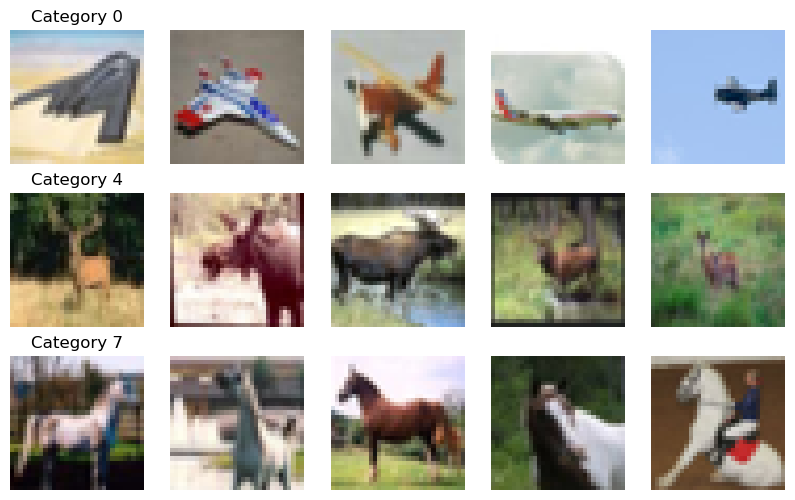

In [ ]:
def plot_sample_images(data, labels, categories, num_samples=5):
    fig, axs = plt.subplots(len(categories), num_samples, figsize=(num_samples * 2, len(categories) * 2))

    for idx, category in enumerate(categories):
        indices = np.where(labels == category)[0]
        random_indices = np.random.choice(indices, num_samples, replace=False)

        for j, image_index in enumerate(random_indices):
            ax = axs[idx, j] if len(categories) > 1 else axs[j]
            ax.imshow(data[image_index])
            ax.axis('off')
            if j == 0:
                ax.set_title(f"Category {category}")
    plt.show()

# Plot images from the categories
plot_sample_images(X_train_filtered, y_train_filtered.flatten(), categories)

Adapting multi-scale features approach for my own version of Spectral clustering. It can improve the robustness and accuracy of the segmentation by incorporating more contextual information at different scales

In [ ]:
def extract_multiscale_features(image, scales=[1, 0.5, 0.25]):
    h, w, c = image.shape
    features = []
    for scale in scales:
        scaled_img = cv2.resize(image, (int(w * scale), int(h * scale)))
        # Convert to grayscale
        gray = color.rgb2gray(scaled_img)
        # Extract color features
        color_features = scaled_img.reshape(-1, 3)
        # Extract texture features (e.g., LBP)
        lbp = feature.local_binary_pattern(gray, P=8, R=1.0)
        lbp_features = lbp.reshape(-1, 1)
        # Combine features
        combined_features = np.hstack((color_features, lbp_features))
        # Rescale features to original size
        if scale != 1:
            combined_features = cv2.resize(combined_features, (w, h)).reshape(h * w, -1)
        features.append(combined_features)
    # Stack features from all scales
    multiscale_features = np.hstack(features)
    return multiscale_features

# Example usage
sample_image = X_train_filtered[0]
features = extract_multiscale_features(sample_image)
print(features.shape)  # Check the shape of the extracted features

NameError: name 'cv2' is not defined